In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the data:



Metdata Lifeline cluster:
/groups/umcg-lifelines/prm02/projects/ov22_0666/dataset_order_202403/
-> Need to be copy to our own local directory for processing!
We copied all the files into our group directory:
/groups/umcg-lifelines/tmp01/projects/ov22_0666/metadata_copy/dataset_order_202403/dataset_order_202403

Blood Metabolome omic:
/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/LLD_bloodlipids_nmr.txt.gz

Data directory: 
/groups/umcg-lifelines/prm03/releases

We proccessed DEEP data ourown (Tal), files are in the cluster under:
/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables

Linkage file to connect metadata sample id with microbiome sample ids:

/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/metadata/OV22_00666_deep_linkage_file-v2.csv”

In [3]:
# Mapping different pids:
linkage_mgs = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/linkage_file_MGS.txt", header=None, sep=" ")
linkage_mgs.columns = ['LLDEEP_ID', 'sample_alias']
linkage_mgs['sample_alias'] = linkage_mgs['sample_alias'].str.replace('LL', '', regex=False)

linkage_ega = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables/EGA-metadata/sample_file.tsv", sep="\t")
linkage_ega['sample_alias'] = linkage_ega['sample_alias'].str.replace('LL', '', regex=False)

pids_mapping = pd.merge(linkage_mgs, linkage_ega, on="sample_alias", how="inner")

In [3]:
taxonomy_deep_path = '/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables/kraken_species_level_taxonomy.tsv'
taxonomy_deep = pd.read_csv(taxonomy_deep_path, sep='\t')

taxonomy_deep = taxonomy_deep.drop(columns=['9002000001328080LL'])

taxonomy_deep = taxonomy_deep.set_index('Taxon').T

taxonomy_deep = taxonomy_deep.reset_index(names='sample')

taxonomy_deep = pd.merge(pids_mapping[["LLDEEP_ID", "file_accession_id"]], taxonomy_deep, 
                         left_on = "file_accession_id", right_on="sample", how="inner").drop(
    columns=['file_accession_id', 'sample']).set_index('LLDEEP_ID')


In [4]:
taxonomy_deep.head()

,JADJOV01 sp016713585,Odoribacter sp905193145,Deinococcus sp000745175,Evtepia sp004551945,Corynebacterium durum,An92 sp009935845,Stercoripulliclostridium_A merdigallinarum,F23-B02 sp900556535,UBA7185 sp900556545,Oxalobacter sp905202055,...,Vibrio sp001874155,Streptosporangium roseum,Bog-1183 sp003136635,Novosphingobium lentum,SOJA01 sp014859805,Bacillus_A cereus,Mycobacterium sp903884065,BMS3BBIN02 sp013151445,Prochlorococcus_A sp003212755,GRL18 sp016097415
LLDEEP_ID,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,0,71,0,37,108,56,14,638,163,0,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0002,29,0,0,0,1203,0,10,0,59,13,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0006,0,189,0,725,291,79,34,49,30,31,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0007,0,520,0,22,214,18,18,63,37,0,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0010,0,318,0,33233,604,75,15,102,67,15,...,0,0,0,0,0,0,0,0,0,0


In [5]:
taxonomy_deep.shape

(1097, 52648)

In [ ]:
# Rarefication curve: Number of observed species vs. number of reads

In [ ]:
# TODO: Wait for Tal answer?

In [7]:
taxonomy_deep.sum(axis=1)

LLDEEP_ID
LLDeep_0001    11984868
LLDeep_0002     9597021
LLDeep_0006    11111243
LLDeep_0007    11604010
LLDeep_0010    14707064
                 ...   
LLDeep_1539     8687998
LLDeep_1541    13120469
LLDeep_1542     9024489
LLDeep_1545    13891838
LLDeep_1546    11363812
Length: 1097, dtype: int64

In [ ]:
# TODO: Rarefied, calculate RA and filter.

### Load metadata - Blood tests:

In [4]:
deep_link = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/metadata/OV22_00666_deep_linkage_file-v2.csv")
a1v2 = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/metadata/1a_v_2_results_filtered_to_deep.csv")
vo = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/metadata/variable_overview.csv")
blood_vo = vo[(vo["subsection"] == "Biospecimen: Blood") & (vo["1a_v_2"] == "x")]["variable_name"].values
a1v2 = pd.merge(a1v2, deep_link,  on = "project_pseudo_id",how='inner')
blood = a1v2.set_index('LLDEEP_ID')[blood_vo]

Blood samples are generally floats, "$5" strings represent missing values.

Also, there are duplicate index (samples) we need to aggregate:

In [5]:
blood = blood.replace(to_replace={'$5':'nan', '$6':'nan'}).astype(float)
blood = blood.groupby(blood.index).median()

In [6]:
blood.head()

,alat_result_all_m_1,albumin_result_all_m_1,alkphos_result_all_m_1,anticcp_result_all_m_1,antidsdna_result_all_m_1,apolipoa1_result_all_m_1,apolipoa1_result_all_m_2,apolipob100_result_all_m_1,apolipob100_result_all_m_2,asat_result_all_m_1,...,potassium_result_all_m_1,sodium_result_all_m_1,ssapreg_result_all_m_1,t3free_result_all_m_1,t4free_result_all_m_1,thrombocyte_result_all_m_1,triglyceride_result_all_m_1,tsh_result_all_m_1,urea_result_all_m_1,uricacid_result_all_m_1
LLDEEP_ID,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.6,NaN,NaN,NaN,NaN,253.0,0.44,NaN,NaN,NaN
LLDeep_0002,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,NaN,NaN,NaN,NaN,257.0,1.23,NaN,NaN,NaN
LLDeep_0006,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,NaN,NaN,NaN,NaN,197.0,7.34,NaN,NaN,NaN
LLDeep_0007,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,3.8,NaN,0.0,NaN,NaN,332.0,0.54,NaN,NaN,NaN
LLDeep_0010,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,282.0,1.10,NaN,NaN,NaN


Some blood measumerments are all nans:

In [11]:
print(f"{blood.columns[blood.isna().all(axis=0)].shape[0]} of the blood measumerment have only nan values out of {blood.shape[1]} features")

19 of the blood measumerment have only nan values out of 56 features


In [15]:
# Filter the all nans:
blood = blood[blood.columns[~blood.isna().all(axis=0)]]

In [17]:
blood.describe()

,anticcp_result_all_m_1,antidsdna_result_all_m_1,basoconc_result_all_m_1,basocount_result_all_m_1,basoperc_result_all_m_1,blood_urine24h_all_m_1,blood_urineems_all_m_1,blood_urineto_all_m_1,cholesterol_result_all_m_1,creatinine_result_all_m_1,...,lymphoperc_result_all_m_1,monoconc_result_all_m_1,monocount_result_all_m_1,monoperc_result_all_m_1,neutroconc_result_all_m_1,neutroperc_result_all_m_1,potassium_result_all_m_1,ssapreg_result_all_m_1,thrombocyte_result_all_m_1,triglyceride_result_all_m_1
count,833.000000,21.000000,1028.000000,6.000000,1028.000000,1044.000000,1044.0,1044.0,1043.000000,1043.00000,...,1028.000000,1028.000000,14.000000,1028.000000,1028.000000,1028.000000,1043.000000,21.000000,1042.000000,1043.000000
mean,2.116447,14.380952,0.031148,1.166667,0.538716,1.111111,5.0,5.0,5.033509,73.15628,...,34.408560,0.500428,6.214286,8.467607,3.260739,53.400973,3.748130,25.571429,239.654511,1.140556
std,6.449667,23.718086,0.017981,0.408248,0.323291,0.474782,0.0,0.0,1.010711,12.66403,...,7.633958,0.155784,3.400873,2.139514,1.206788,8.172000,0.266173,60.316309,51.461126,0.878172
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.0,5.0,2.400000,44.00000,...,10.000000,0.200000,0.000000,3.300000,0.950000,26.600000,2.900000,0.000000,13.000000,0.220000
25%,1.000000,1.000000,0.020000,1.000000,0.300000,1.000000,5.0,5.0,4.350000,64.00000,...,29.700000,0.400000,4.250000,7.000000,2.480000,48.100000,3.600000,0.000000,203.000000,0.680000
50%,2.000000,4.000000,0.030000,1.000000,0.500000,1.000000,5.0,5.0,4.900000,72.00000,...,34.200000,0.480000,6.000000,8.200000,3.070000,53.400000,3.700000,0.000000,238.000000,0.930000
75%,2.000000,18.000000,0.040000,1.000000,0.700000,1.000000,5.0,5.0,5.700000,81.00000,...,38.900000,0.572500,9.250000,9.600000,3.750000,58.600000,3.900000,17.000000,268.750000,1.330000
max,149.000000,89.000000,0.170000,2.000000,3.000000,5.000000,5.0,5.0,9.700000,151.00000,...,61.400000,1.340000,11.000000,27.500000,14.150000,80.500000,5.000000,240.000000,452.000000,14.050000


Some measurment have a fixed value for all samples, filter them as well:

In [24]:
blood = blood[blood.columns[blood.std(axis=0) != 0]]

Some of the measurments have mostly nan valued sample, which does not fit the kind of anaylsis we wish to preform. We will look only on the features which have less then 10% missing samples.

(which leave us with 27 out of the 56 features we started with)

We will look only on continous measumrments and not on categorical variables:
(drup two columns)

In [41]:
blood = blood[blood.columns[blood.apply(lambda x: len(x.unique())) >= 5]]

In [29]:
blood = blood[blood.columns[blood.isna().sum() < (blood.shape[0] / 10)]]

In [42]:
blood.shape

(1044, 25)

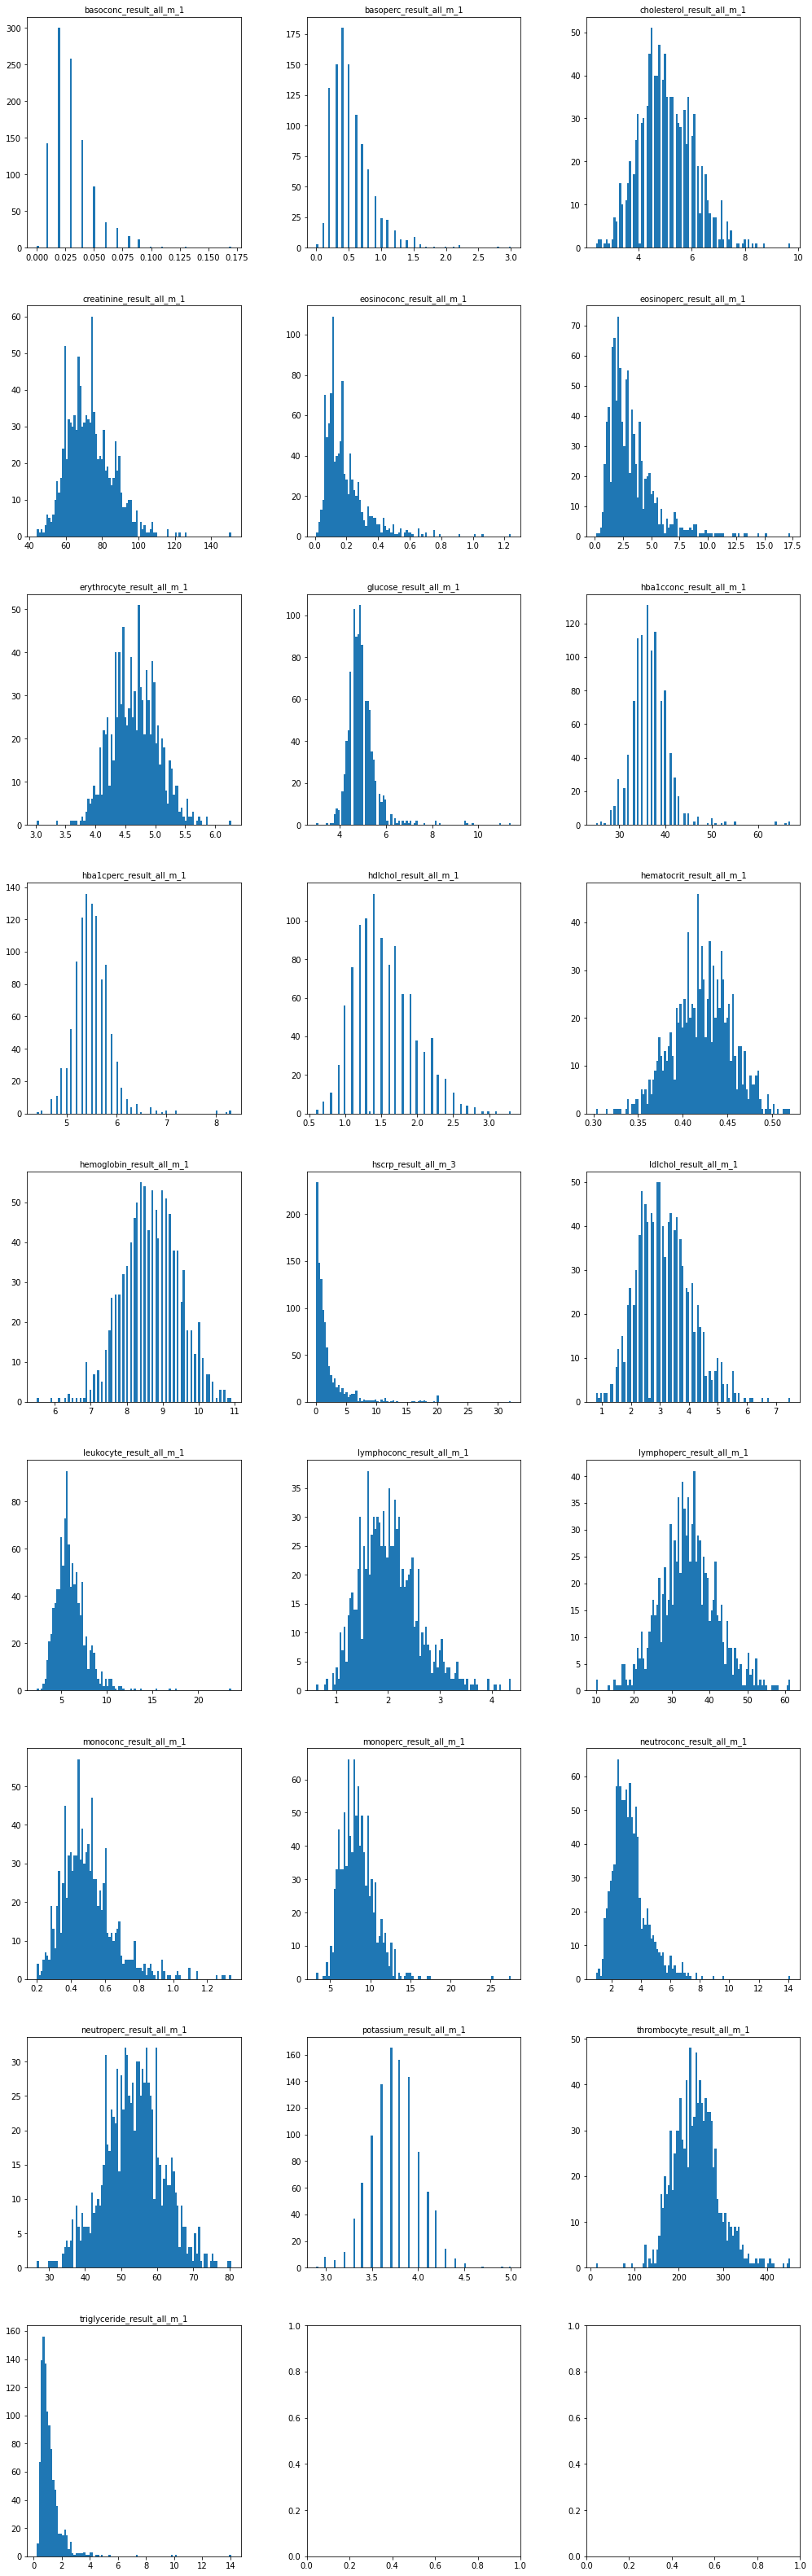

In [43]:
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(15,45))
fig.tight_layout(pad=5.0)
for i, measure in enumerate(blood):
    r = i//3
    c = i%3
    ax[r][c].hist(blood[measure], bins=100)
    ax[r][c].set_title(measure)
    ax[r][c].title.set_size(10)
plt.show()

Data after log + standard transform:

In [45]:
(blood == 0).sum()

basoconc_result_all_m_1        3
basoperc_result_all_m_1        3
cholesterol_result_all_m_1     0
creatinine_result_all_m_1      0
eosinoconc_result_all_m_1      0
eosinoperc_result_all_m_1      0
erythrocyte_result_all_m_1     0
glucose_result_all_m_1         0
hba1cconc_result_all_m_1       0
hba1cperc_result_all_m_1       0
hdlchol_result_all_m_1         0
hematocrit_result_all_m_1      0
hemoglobin_result_all_m_1      0
hscrp_result_all_m_3           0
ldlchol_result_all_m_1         0
leukocyte_result_all_m_1       0
lymphoconc_result_all_m_1      0
lymphoperc_result_all_m_1      0
monoconc_result_all_m_1        0
monoperc_result_all_m_1        0
neutroconc_result_all_m_1      0
neutroperc_result_all_m_1      0
potassium_result_all_m_1       0
thrombocyte_result_all_m_1     0
triglyceride_result_all_m_1    0
dtype: int64

In [62]:
blood_prep2 = blood[['basoconc_result_all_m_1', 'basoperc_result_all_m_1']].map(lambda x: np.log(x+1))

In [63]:
blood_prep2 = pd.DataFrame(standard_scaler.fit_transform(blood_prep2), index=blood_prep2.index, columns = blood_prep2.columns)

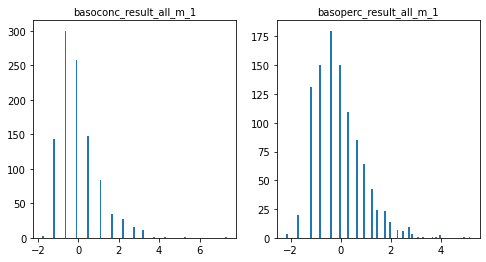

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for i, measure in enumerate(blood_prep2):
    ax[i].hist(blood_prep2[measure], bins=100)
    ax[i].set_title(measure)
    ax[i].title.set_size(10)
plt.show()

Lets put aside for a second basoconc_result_all_m_1 and basoperc_result_all_m_1
which have zeros, and focus on the other columns

In [47]:
blood_prep = blood.drop(columns=['basoconc_result_all_m_1', 'basoperc_result_all_m_1'])

In [49]:
blood_prep = blood_prep.map(lambda x: np.log(x))

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
blood_prep = pd.DataFrame(standard_scaler.fit_transform(blood_prep), index=blood_prep.index, columns = blood_prep.columns)

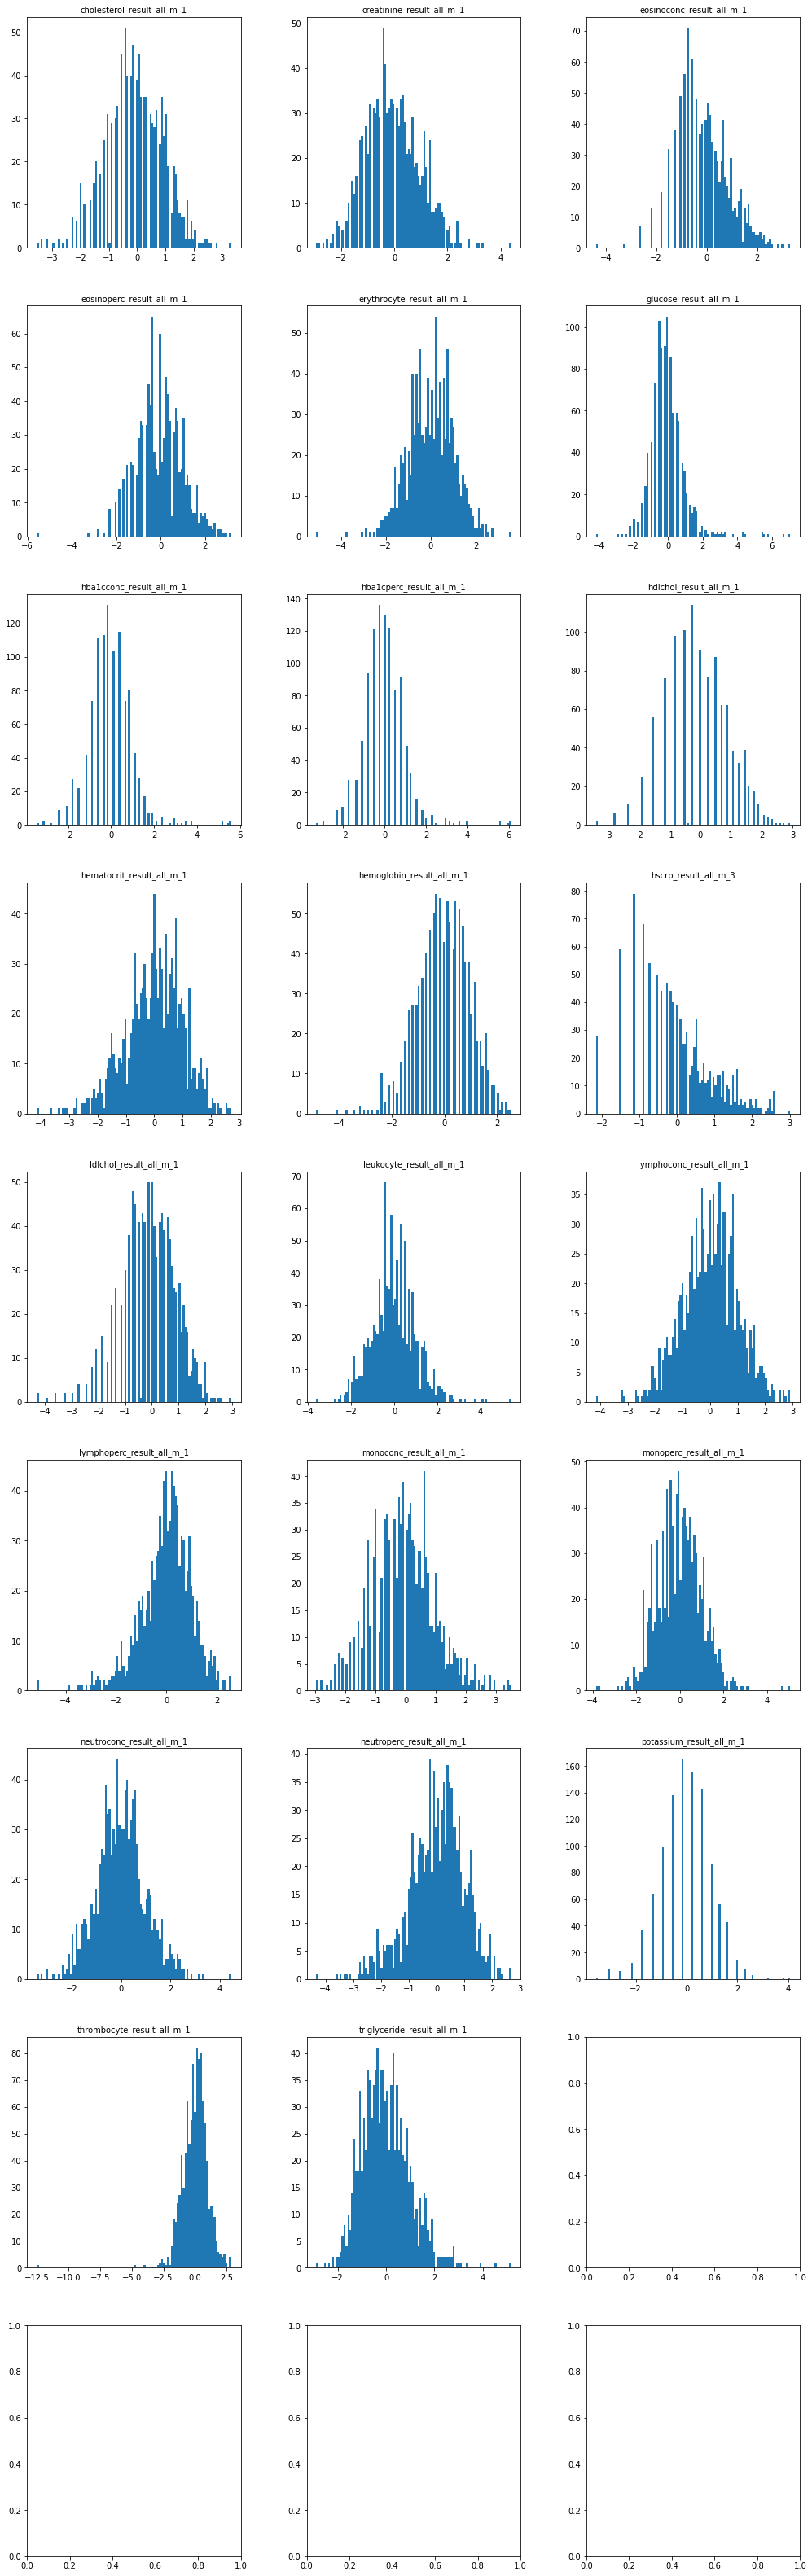

In [52]:
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(15,45))
fig.tight_layout(pad=5.0)
for i, measure in enumerate(blood_prep):
    r = i//3
    c = i%3
    ax[r][c].hist(blood_prep[measure], bins=100)
    ax[r][c].set_title(measure)
    ax[r][c].title.set_size(10)
plt.show()

In [67]:
blood_prep3 = blood
blood_prep3 = blood_prep3.map(lambda x: np.log(x+1))
blood_prep3 = pd.DataFrame(standard_scaler.fit_transform(blood_prep3), index=blood_prep3.index, columns = blood_prep3.columns)

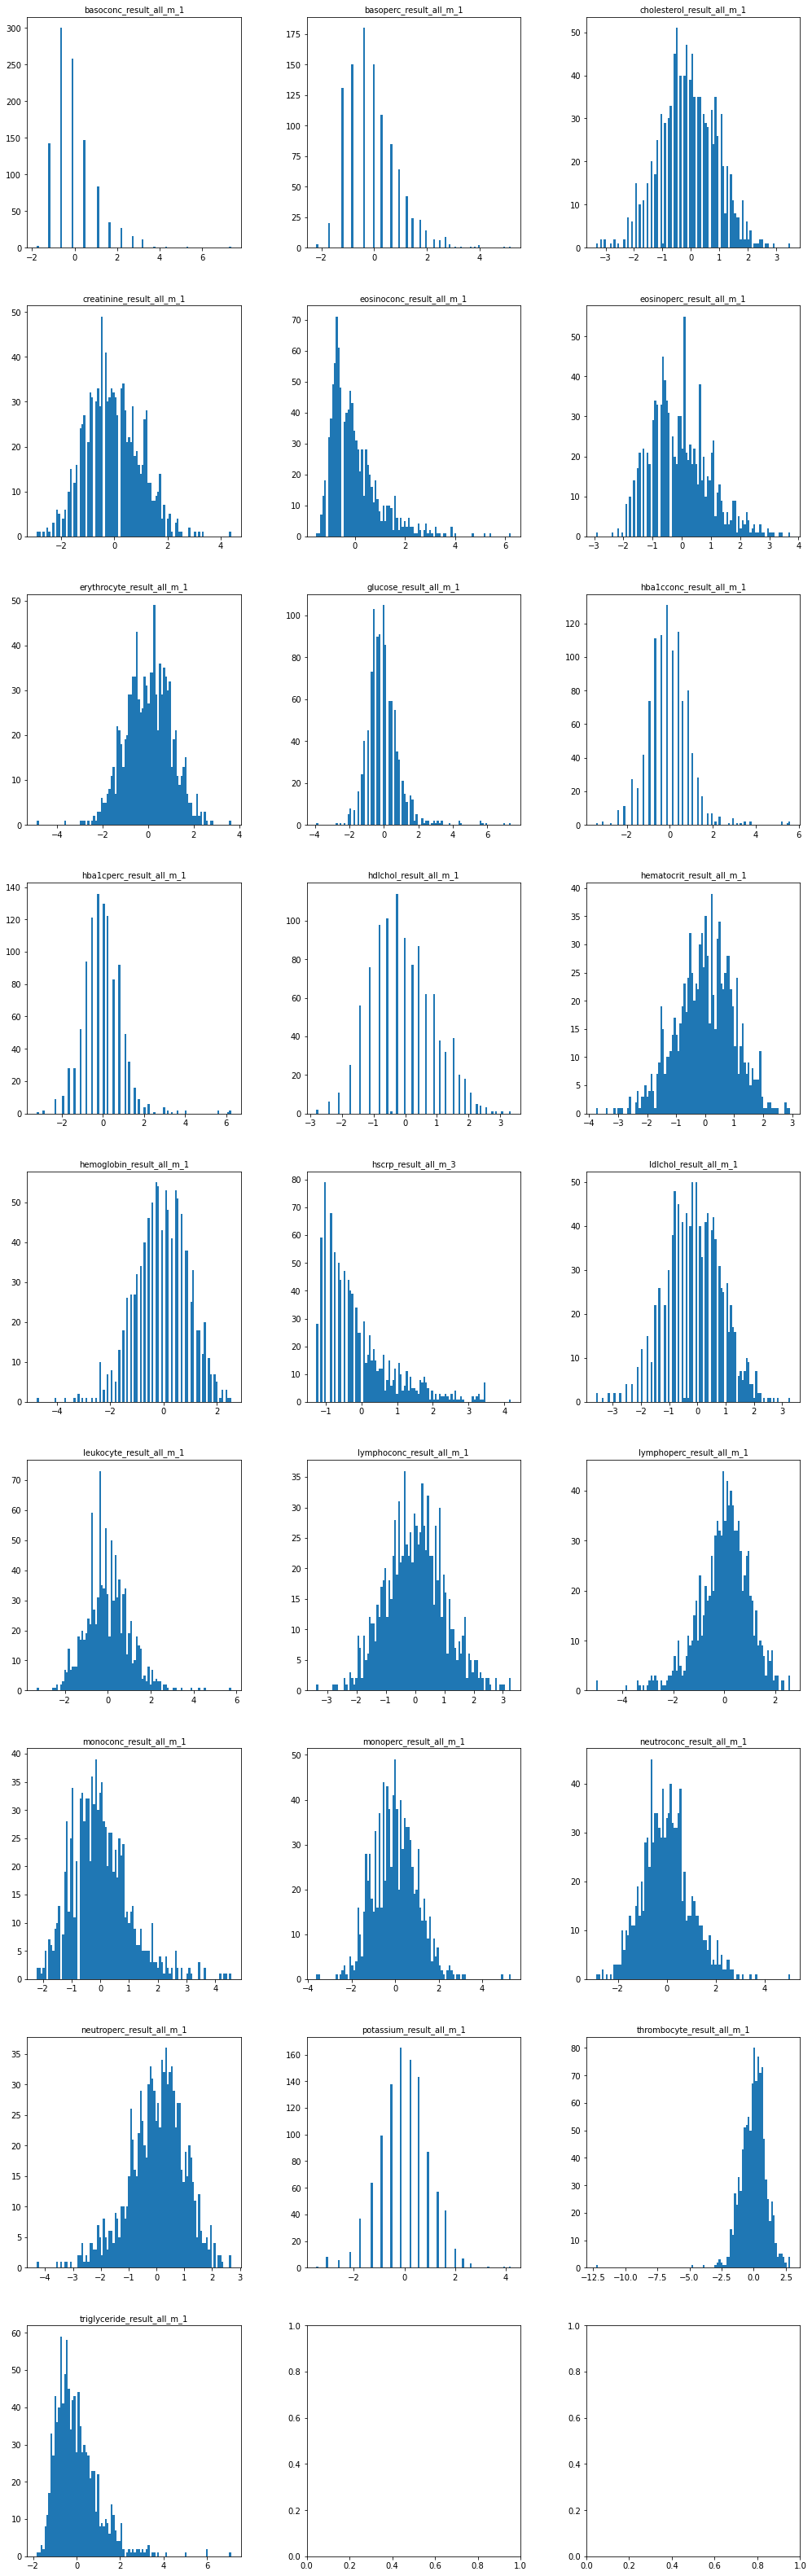

In [68]:
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(15,45))
fig.tight_layout(pad=5.0)
for i, measure in enumerate(blood_prep3):
    r = i//3
    c = i%3
    ax[r][c].hist(blood_prep3[measure], bins=100)
    ax[r][c].set_title(measure)
    ax[r][c].title.set_size(10)
plt.show()

In [2]:
readme_blood_metabolites_path = '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/README_deep_nmr_data.txt'
with open(readme_blood_metabolites_path, "r") as f:
    print(f.read())

# README
# ==========================
# GENERAL INFO
# ==========================
Name of release folder: /groups/umcg-lifelines/prm03/releases/deep_nmr_data
Study title: Metabolomics in Lifelines-DEEP 
Created by: Jingyuan Fu
Created on: 31-03-2020
Updated by: Dasha Zhernakova
Updated on: 07-08-2023
Contact at: j.fu@umcg.nl / dashazhernakova@gmail.com
Principal Investigator: Jingyuan Fu (j.fu@umcg.nl)
Sample count: 1491

# =========================
SUMMARY OF RESEARCH
# =========================

A wide range of plasma metabolites using nuclear magnetic resonance (NMR) and Nightingale Biomarker Analysis Platform.
This platform provides measures of 231 plasma metabolome traits, including total lipid concentrations and relative compositions of 14 lipoprotein subclasses, lipoprotein particle sizes, apolipoproteins, cholesterol, glycerides and phospholipid concentrations, various glycolysis components, fatty acid composition, inflammation, fluid balance, ketone bodies, and AAs.
Reference:

Blood metabolites data description can be found in this article: 
https://pubmed.ncbi.nlm.nih.gov/30971183/

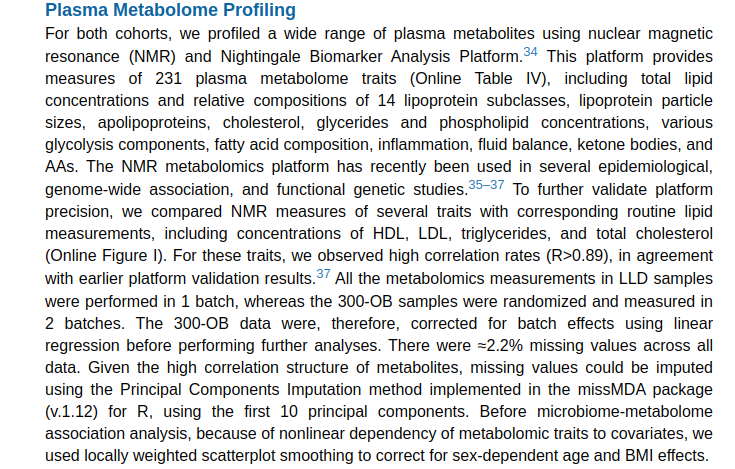

**Note**: 
* They suggest to impute missing values using Prinical Components imputation (missMDA package in R) using the first 10 pricinpal component.
* They suggest to correct for sex-dependent age ang BMI effects using locally weighted scatterplot smoothing.

*Which preprocess they did to the data?*

It seems like it's the raw NMR data. But I'm looking deeper into the article to see wether they preform normalization and which

-> It wasn't clear from the article nor from the supplementay data


In [5]:
import gzip

blood_metabolites_names_path = '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/NMR_lipid_names.txt.gz'
with gzip.open(blood_metabolites_names_path, 'rb') as f:
    blood_metabolites_names = pd.read_csv(f, sep='\t')
blood_metabolites_names = blood_metabolites_names.set_index('Metabolite').squeeze()

In [20]:
blood_metabolites_names.head()

,Metabolite full name
Metabolite,
S.VLDL.C,Total cholesterol in small VLDL (mmol/l)
ApoB.ApoA1,Ratio of apolipoprotein B to apolipoprotein A-I
VLDL.C,Total cholesterol in VLDL (mmol/l)
S.VLDL.FC,Free cholesterol in small VLDL (mmol/l)
XXL.VLDL.CE,Cholesterol esters in chylomicrons and extreme...


In [58]:

blood_metabolites_path =  '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/LLD_bloodlipids_nmr.txt.gz'

with gzip.open(blood_metabolites_path, 'rb') as f:
    blood_metabolites = pd.read_csv(f, sep='\t')

In [59]:
blood_metabolites = blood_metabolites.set_index('id').rename({'id':'LLDEEP_ID'})

In [60]:
blood_metabolites.head()

,XXL.VLDL.P,XXL.VLDL.L,XXL.VLDL.PL,XXL.VLDL.C,XXL.VLDL.CE,XXL.VLDL.FC,XXL.VLDL.TG,XL.VLDL.P,XL.VLDL.L,XL.VLDL.PL,...,Leu,Val,Phe,Tyr,Ace,AcAce,bOHBut,Crea,Alb,Gp
id,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,2.450000e-11,0.00528,0.000636,0.00109,0.000688,0.000397,0.00356,0.000000e+00,0.0000,0.00000,...,0.0641,0.215,0.0350,0.0524,0.0759,0.0392,0.1510,0.0574,0.0878,1.06
LLDeep_0002,1.570000e-10,0.03360,0.003910,0.00582,0.003270,0.002550,0.02390,8.120000e-10,0.0797,0.01190,...,0.0713,0.171,0.0434,0.0641,0.0502,0.0356,0.0525,0.0801,0.0901,1.22
LLDeep_0004,7.330000e-11,0.01590,0.001820,0.00360,0.002360,0.001240,0.01050,3.950000e-10,0.0396,0.00583,...,0.0755,0.184,0.0392,0.0397,0.0814,0.0482,0.0635,0.0822,0.0906,1.07
LLDeep_0005,8.570000e-11,0.01810,0.002250,0.00231,0.001010,0.001300,0.01350,4.200000e-10,0.0405,0.00519,...,0.0708,0.173,0.0338,0.0616,0.0555,0.0380,0.0711,0.0706,0.0901,1.09
LLDeep_0006,1.690000e-09,0.36000,0.044200,0.05540,0.025900,0.029500,0.26000,9.520000e-09,0.9220,0.15100,...,NaN,NaN,0.0519,0.0836,0.0615,0.1270,NaN,0.0939,0.1000,2.15


As preprocessing we will log-transform the data and then apply Standard scalling, so that it will resamble more to normal distribution. 

We still need to Impute the data! 

In [61]:
# TODO: Impute missing values
# Note zero is nan values:
blood_metabolites = blood_metabolites.replace(to_replace=0, value=np.nan).map(lambda x: np.log(x))

# Extract statistics on missing values (number on nans)
print(blood_metabolites.shape)
print(np.sum(blood_metabolites.isna()).describe)
print(np.sum(blood_metabolites.isna()).sort_values()[-30:0])

(1440, 231)
XXL.VLDL.P     91
XXL.VLDL.L     91
XXL.VLDL.PL    91
XXL.VLDL.C     91
XXL.VLDL.CE    91
               ..
AcAce           0
bOHBut          6
Crea            0
Alb             0
Gp              0
Length: 231, dtype: int64


/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/noamark/Human2Dogs/noa_h2d/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Most metabolites have almost all the samples (really small number of missing values, <10% of the samples, out of ~1400 samples) But a few 30/231 are missing around 20% of the samples. 

Currently we will drop this metabolites from the anaylsis, if we would like to include them, then we shell consider missing data imputtation.

In [77]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
blood_metabolites = pd.DataFrame(standard_scaler.fit_transform(blood_metabolites), index=blood_metabolites.index, columns = blood_metabolites.columns)

In [79]:
blood_metabolites.head()

,XXL.VLDL.P,XXL.VLDL.L,XXL.VLDL.PL,XXL.VLDL.C,XXL.VLDL.CE,XXL.VLDL.FC,XXL.VLDL.TG,XL.VLDL.P,XL.VLDL.L,XL.VLDL.PL,...,Leu,Val,Phe,Tyr,Ace,AcAce,bOHBut,Crea,Alb,Gp
id,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,-0.960186,-0.975006,-0.976378,-0.968798,-0.867496,-0.894215,-0.894032,NaN,NaN,NaN,...,0.596074,1.790850,-0.691939,0.003691,1.414576,0.413581,1.244888,-0.935020,0.020909,-1.186316
LLDeep_0002,0.667838,0.661126,0.616000,0.521485,0.463438,0.579550,0.688658,0.552067,0.544621,0.522335,...,1.132464,0.730777,0.705515,0.855884,0.297732,0.247763,-0.675240,0.874045,0.382633,-0.092790
LLDeep_0004,0.000278,-0.000370,-0.054501,0.094124,0.184975,0.008255,0.004999,-0.086775,-0.089211,0.002070,...,1.420867,1.070002,0.044292,-1.169940,1.603575,0.769348,-0.329503,1.014540,0.460046,-1.113277
LLDeep_0005,0.137256,0.114204,0.131466,-0.300604,-0.539691,0.045698,0.213890,-0.032370,-0.068846,-0.082718,...,1.097005,0.784611,-0.918581,0.687666,0.568886,0.360064,-0.124039,0.188675,0.382633,-0.969226
LLDeep_0006,2.750435,2.757861,2.742441,2.526129,2.230426,2.519541,2.672553,2.734380,2.763247,2.374919,...,NaN,NaN,1.867461,1.978958,0.846216,2.437016,NaN,1.736985,1.840934,4.314676
